In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")
#Remove Serial Number
data.drop("sl_no", axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [3]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data["gender"]=le.fit_transform(data["gender"])
data["hsc_s"]=le.fit_transform(data["hsc_s"])
data["degree_t"]=le.fit_transform(data["degree_t"])
data["workex"]=le.fit_transform(data["workex"])
data["status"]=le.fit_transform(data["status"])
data["specialisation"]=le.fit_transform(data["specialisation"])
data["ssc_b"]=le.fit_transform(data["ssc_b"])
data["hsc_b"]=le.fit_transform(data["hsc_b"])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int64  
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    int64  
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    int64  
 5   hsc_s           215 non-null    int64  
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    int64  
 8   workex          215 non-null    int64  
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    int64  
 11  mba_p           215 non-null    float64
 12  status          215 non-null    int64  
 13  salary          148 non-null    float64
dtypes: float64(6), int64(8)
memory usage: 23.6 KB


In [4]:
data.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

<AxesSubplot:>

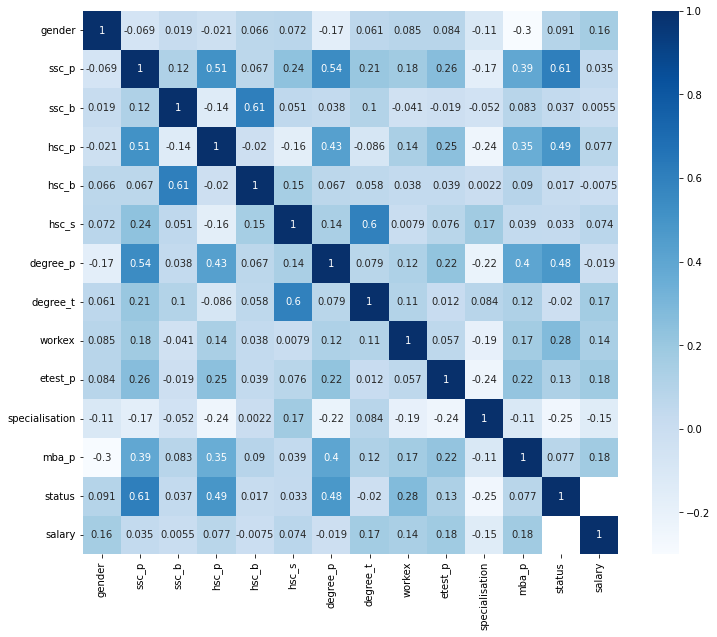

In [5]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

In [6]:
#board of education is not considered in placements so remove from df
data.drop(['ssc_b','hsc_b'],axis=1,inplace=True)

In [7]:
data.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0,NaN
4,1,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1,425000.0


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
X = data[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p',]]
y = data['status']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
from sklearn.model_selection import GridSearchCV 
rf=RandomForestClassifier() 
param={'n_estimators':[100,200,350,500],'min_samples_leaf':[2,10,30]} 
grid=GridSearchCV(rf,param_grid=param,cv=5) 
grid.fit(X_train,y_train) 
print(grid.best_params_)

{'min_samples_leaf': 2, 'n_estimators': 100}


In [11]:
random_forest = RandomForestClassifier(n_estimators=350, min_samples_leaf=2, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy_score(y_test,y_pred)

0.9230769230769231

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        21
           1       0.90      1.00      0.95        44

    accuracy                           0.92        65
   macro avg       0.95      0.88      0.91        65
weighted avg       0.93      0.92      0.92        65

